Simple linear regression is used to model the linear relationship between a single independent variable and a dependent variable.

We start off by importing the required libraries, including the `LinearRegression` package.

In [3]:
# Import required libraries
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

We import a dataset that aggregates a World Happiness Report, which is a survey of the state of global happiness. It contains surveyed information regarding 156 countries around the world and their overall happiness. Additionally, it contains information like` GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, and `Perceptions of corruption`. Information from here can be used to inform policy-making decisions.

In our case, we want to see how much do these listed factors influence overall happiness.

In [4]:
data = pd.read_csv("../../datasets/happiness_report.csv")

So which one of these factors might be interesting to look like? I thought it might be interesting to look at how `GDP per capita`, `Social support`, `Healthy life expectancy`, and `Freedom to make life choices` potentially influence the `Score`. 

As a result, we're going to create DataFrames for each of these columns of data that we want to designate as independent variables:

1. `gdp` represents `GDP per capita`
2. `social_support` represents `Social support`
3. `life_expectancy` represents `Healthy life expectancy`
4. `freedom` represents `Freedom to make life chocies`

We also need to create a DataFrame for the `Score` column so that we can designate it as a dependent variable.

In [6]:
# x values
gdp = data['GDP per capita'].values.reshape(-1, 1)
social_support = data['Social support'].values.reshape(-1, 1)
life_expectancy = data['Healthy life expectancy'].values.reshape(-1, 1)
freedom = data['Freedom to make life choices'].values.reshape(-1, 1)
# y values
score = data['Score'].values

I wanted to do a linear regression model that examine the effects of GDP per capita on happiness score. 

To do this, we have to create a LinearRegression object that we can assign to `gdpModel`. This object can then be used to fit two arrays, `gdp` and `score`. This is done using the `fit()` method, which fits the 2 arrays based on minimizing the sum of squared residuals. From there, we can use the model to make predictions of what the `score` values will be based on `gdp` values. The values are stored into `gdp_predict_score`. 

In [7]:
gdpModel = LinearRegression()

gdpModel.fit(gdp, score)

gdp_predict_score = gdpModel.predict(gdp)

We repeat this process to that examines the effects of

* `Social support`
* `Healthy life expectancy`
* `Freedom to make life choices`

upon `Score`

In [8]:
socialSupportModel = LinearRegression()

# Train the model
socialSupportModel.fit(social_support, score)

# Make predictions
social_support_predict_score = socialSupportModel.predict(social_support)
lifeExpectancyModel = LinearRegression()

# Train the model
lifeExpectancyModel.fit(life_expectancy, score)

# Make predictions
life_expectancy_predict_score = lifeExpectancyModel.predict(life_expectancy)
freedomModel = LinearRegression()

# Train the model
freedomModel.fit(freedom, score)

# Make predictions
freedom_predict_score = freedomModel.predict(freedom)

Now that we have the predictions for each of the independent variables, we can plot the data and run a best-fit line.

 In this example, I wanted to create subplots so I could show the relationship between all 4 independent variables with `score` The first subplot is a scatterplot showing the relationship between `GDP per capita` and `Score`. The data is first scattered on the grid and then we run a best-fit line through this data. This line shows predictions of the `score` based on `GDP per capita`, with the assumption that their relationship is linear. We then create subplots for all of the other relationships and label them with the appropriate titles.

 All of them seem to have a positive relationship, meaning as the independent value $x$ increases, the dependent values $y$ also increases

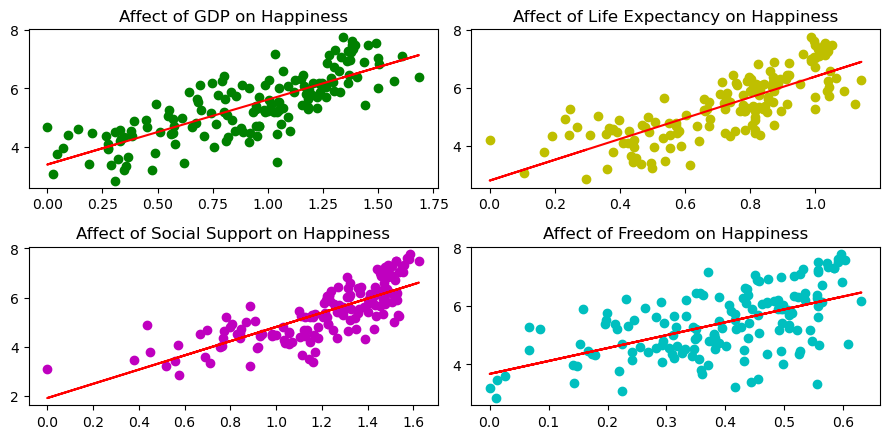

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(9, 4.5), tight_layout=True)

axs[0, 0].scatter(gdp, score, c="g")
axs[0, 0].plot(gdp, gdp_predict_score, c="r")
axs[0, 0].set_title("Affect of GDP on Happiness")

axs[1, 0].scatter(social_support, score,  c="m")
axs[1, 0].plot(social_support, social_support_predict_score, c="r")
axs[1, 0].set_title("Affect of Social Support on Happiness")

axs[0, 1].scatter(life_expectancy, score, c="y")
axs[0, 1].plot(life_expectancy, life_expectancy_predict_score, c="r")
axs[0, 1].set_title("Affect of Life Expectancy on Happiness")

axs[1, 1].scatter(freedom, score, c="c")
axs[1, 1].plot(freedom, freedom_predict_score, c="red")
axs[1, 1].set_title("Affect of Freedom on Happiness")

plt.show()